In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
penguins_df = pd.read_csv('penguins.csv')
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguins_df = penguins_df.dropna()
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [5]:
df = pd.get_dummies(penguins_df).drop('sex_.', axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X, columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.897723,0.777263,-0.126893,-0.572233,-0.985184,0.991085
1,-0.824265,0.117037,-0.107872,-0.509923,1.015038,-1.008996
2,-0.677349,0.421757,-0.073633,-1.195338,1.015038,-1.008996
3,-1.338472,1.081983,-0.081242,-0.946096,1.015038,-1.008996
4,-0.860994,1.742210,-0.092655,-0.696854,-0.985184,0.991085
5,-0.934452,0.320183,-0.126893,-0.728010,1.015038,-1.008996
6,-0.879359,1.234343,-0.073633,0.580511,-0.985184,0.991085
7,-0.365152,1.539063,18.206039,0.050871,-0.985184,0.991085
8,-0.530433,0.218610,-0.123089,-1.257649,1.015038,-1.008996
9,-0.989546,2.046930,-0.088850,-0.509923,-0.985184,0.991085


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
dfx_pca = pca.fit(penguins_preprocessed)
dfx_pca.explained_variance_ratio_

n_components = sum(dfx_pca.explained_variance_ratio_ > 0.2)

pca = PCA(n_components=n_components)
penguins_pca = pca.fit_transform(penguins_preprocessed)
print(n_components)

2


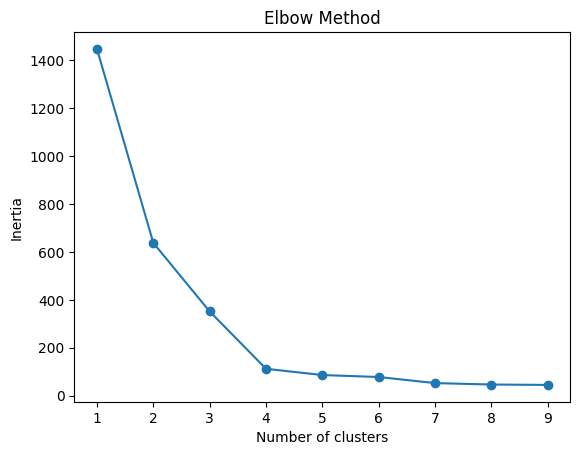

In [9]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

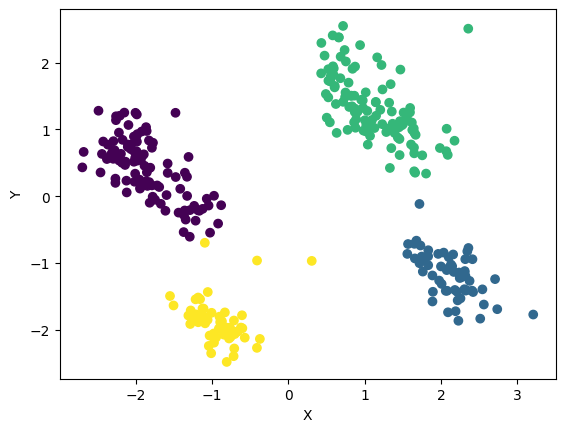

In [13]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(penguins_pca)

plt.scatter(penguins_pca[:, 0], penguins_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()